# Import libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import config
import os

In [2]:
# set figure details
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Pathway coverage

In [3]:
pathway_coverage_clean = pd.read_csv(os.path.join(config.CLEAN_DIR, "humann_pathcoverage_clean.tsv"), index_col=0, sep="\t")
pathway_coverage_clean

,1CMET2-PWY: folate transformations III (E. coli),ANAGLYCOLYSIS-PWY: glycolysis III (from glucose),ARGSYN-PWY: L-arginine biosynthesis I (via L-ornithine),ARGSYNBSUB-PWY: L-arginine biosynthesis II (acetyl cycle),ARO-PWY: chorismate biosynthesis I,ASPASN-PWY: superpathway of L-aspartate and L-asparagine biosynthesis,BRANCHED-CHAIN-AA-SYN-PWY: superpathway of branched chain amino acid biosynthesis,CALVIN-PWY: Calvin-Benson-Bassham cycle,COA-PWY-1: superpathway of coenzyme A biosynthesis III (mammals),COA-PWY: coenzyme A biosynthesis I (prokaryotic),...,PWY0-1319: CDP-diacylglycerol biosynthesis II,PWY0-1477: ethanolamine utilization,PWY0-1586: peptidoglycan maturation (meso-diaminopimelate containing),PWY66-429: fatty acid biosynthesis initiation (mitochondria),PYRIDNUCSYN-PWY: NAD de novo biosynthesis I (from aspartate),SER-GLYSYN-PWY: superpathway of L-serine and glycine biosynthesis I,THRESYN-PWY: superpathway of L-threonine biosynthesis,TRNA-CHARGING-PWY: tRNA charging,UDPNAGSYN-PWY: UDP-N-acetyl-D-glucosamine biosynthesis I,VALSYN-PWY: L-valine biosynthesis
id,,,,,,,,,,,,,,,,,,,,,
magic.0001,3.000000e-10,0.000000,0.000000e+00,0.000000,6.957000e-07,1.000000e+00,9.618600e-01,0.999819,1.700000e-09,0.001692,...,0.999990,1.000000,1.000000,0.944793,0.000000,0.000065,0.049756,0.995139,1.417811e-02,1.000000
magic.0004,0.000000e+00,0.000003,1.766000e-07,0.000000,7.000000e-10,1.000000e+00,2.008366e-01,0.995381,0.000000e+00,0.000000,...,0.942276,1.000000,1.000000,0.017989,0.000003,0.000715,0.000791,0.988003,9.600166e-01,1.000000
magic.0006,1.797225e-02,0.804366,0.000000e+00,0.000000,4.338250e-01,0.000000e+00,3.390000e-08,0.601624,4.458461e-02,0.066865,...,0.488695,1.000000,0.969052,0.936892,0.000000,0.131251,0.054117,0.268299,8.479080e-01,0.518371
magic.0007,1.562700e-06,0.000000,0.000000e+00,0.000000,9.988929e-01,1.000000e+00,1.000000e+00,1.000000,0.000000e+00,0.000000,...,1.000000,0.692740,1.000000,0.999951,0.000000,0.000000,0.989604,1.000000,0.000000e+00,1.000000
magic.0008,0.000000e+00,1.000000,0.000000e+00,0.000000,2.693422e-01,4.726466e-01,8.847411e-01,0.999999,1.600000e-08,0.000045,...,0.999710,0.000011,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,8.926283e-03,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.999871,1.000000,1.000000,1.000000,0.000000e+00,1.000000
magic.6597,9.999997e-01,0.000000,1.000000e+00,1.000000,1.000000e+00,2.480000e-08,1.247611e-02,0.000000,1.000000e+00,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000165,0.822385,0.999913,1.000000,0.000000e+00,1.000000
magic.6598,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000e+00,1.000000e+00,0.999870,1.000000e+00,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.824149,0.992349,0.999999,1.000000,9.999726e-01,1.000000


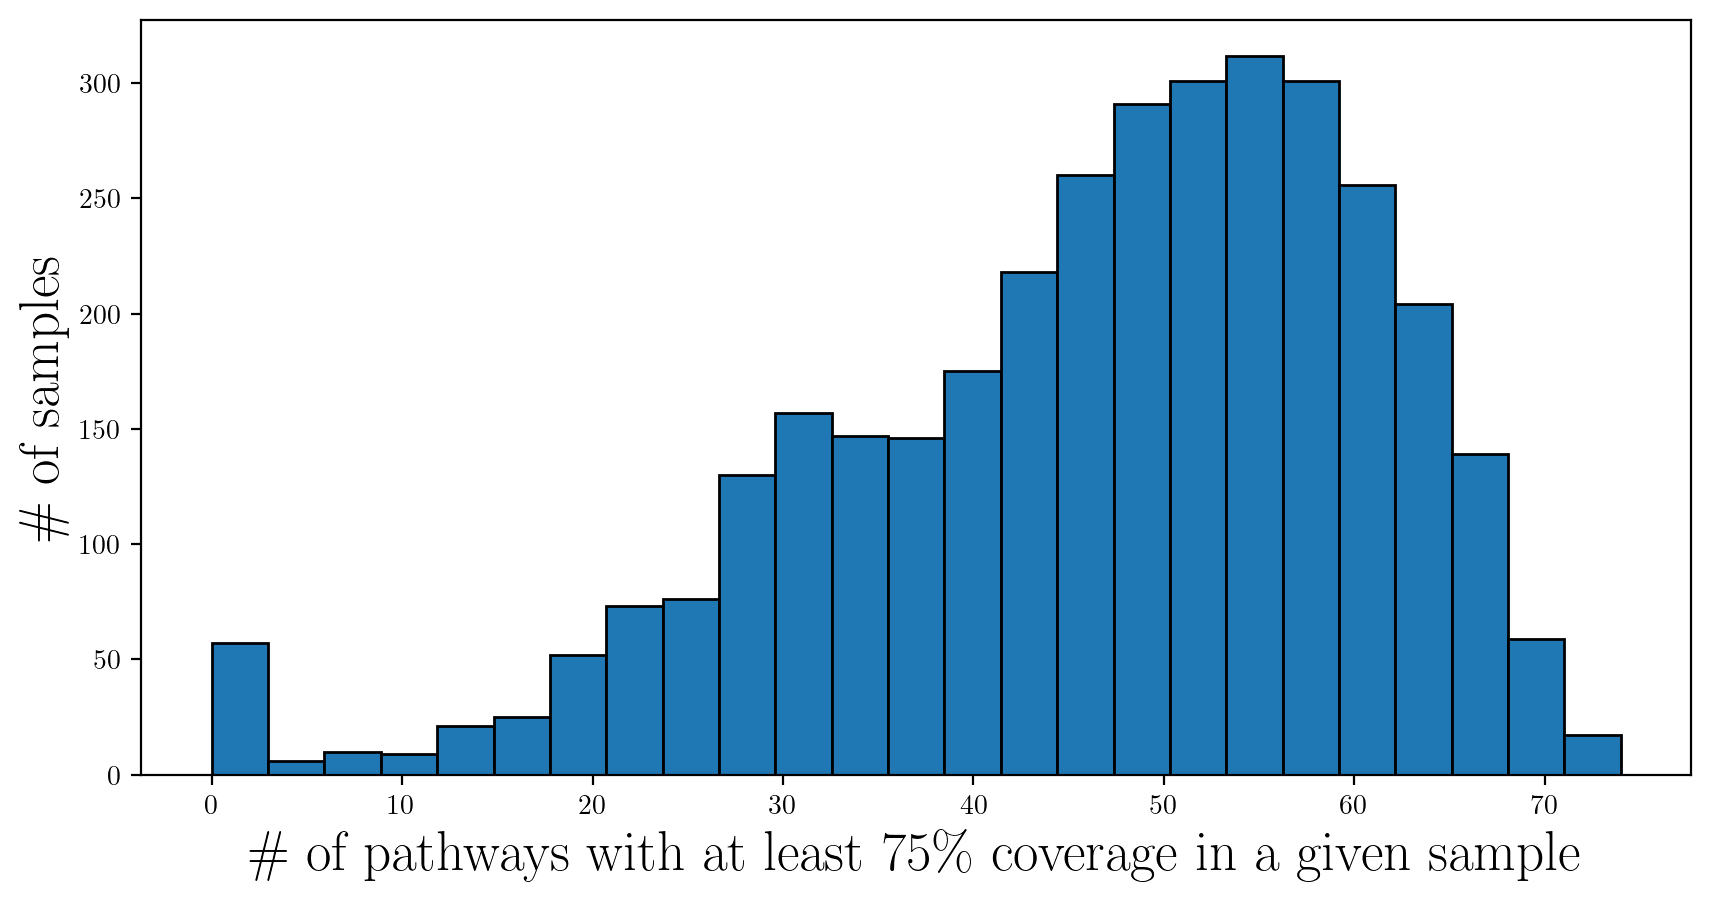

In [4]:
plt.figure(figsize=(10, 5), dpi=200)

pathway_presence = (pathway_coverage_clean > 0.75)
counts = pathway_presence.sum(axis=1)

plt.hist(counts, bins=25, edgecolor="black")
plt.xlabel("\# of pathways with at least 75\% coverage in a given sample", fontsize=20)
plt.ylabel("\# of samples", fontsize=20)

plt.show()

# By sequencing project

In [10]:
metadata = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.tsv"), sep="\t", index_col=0)
metadata["Sequencing_Project_num"] = metadata["Sequencing_Project"].apply(lambda x : x.split("_")[2])
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,Sequencing_Project_num
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781,046
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038,046
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636,076
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,076
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,077
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,077
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,077


Text(0.5, 0, 'Sequencing Project')

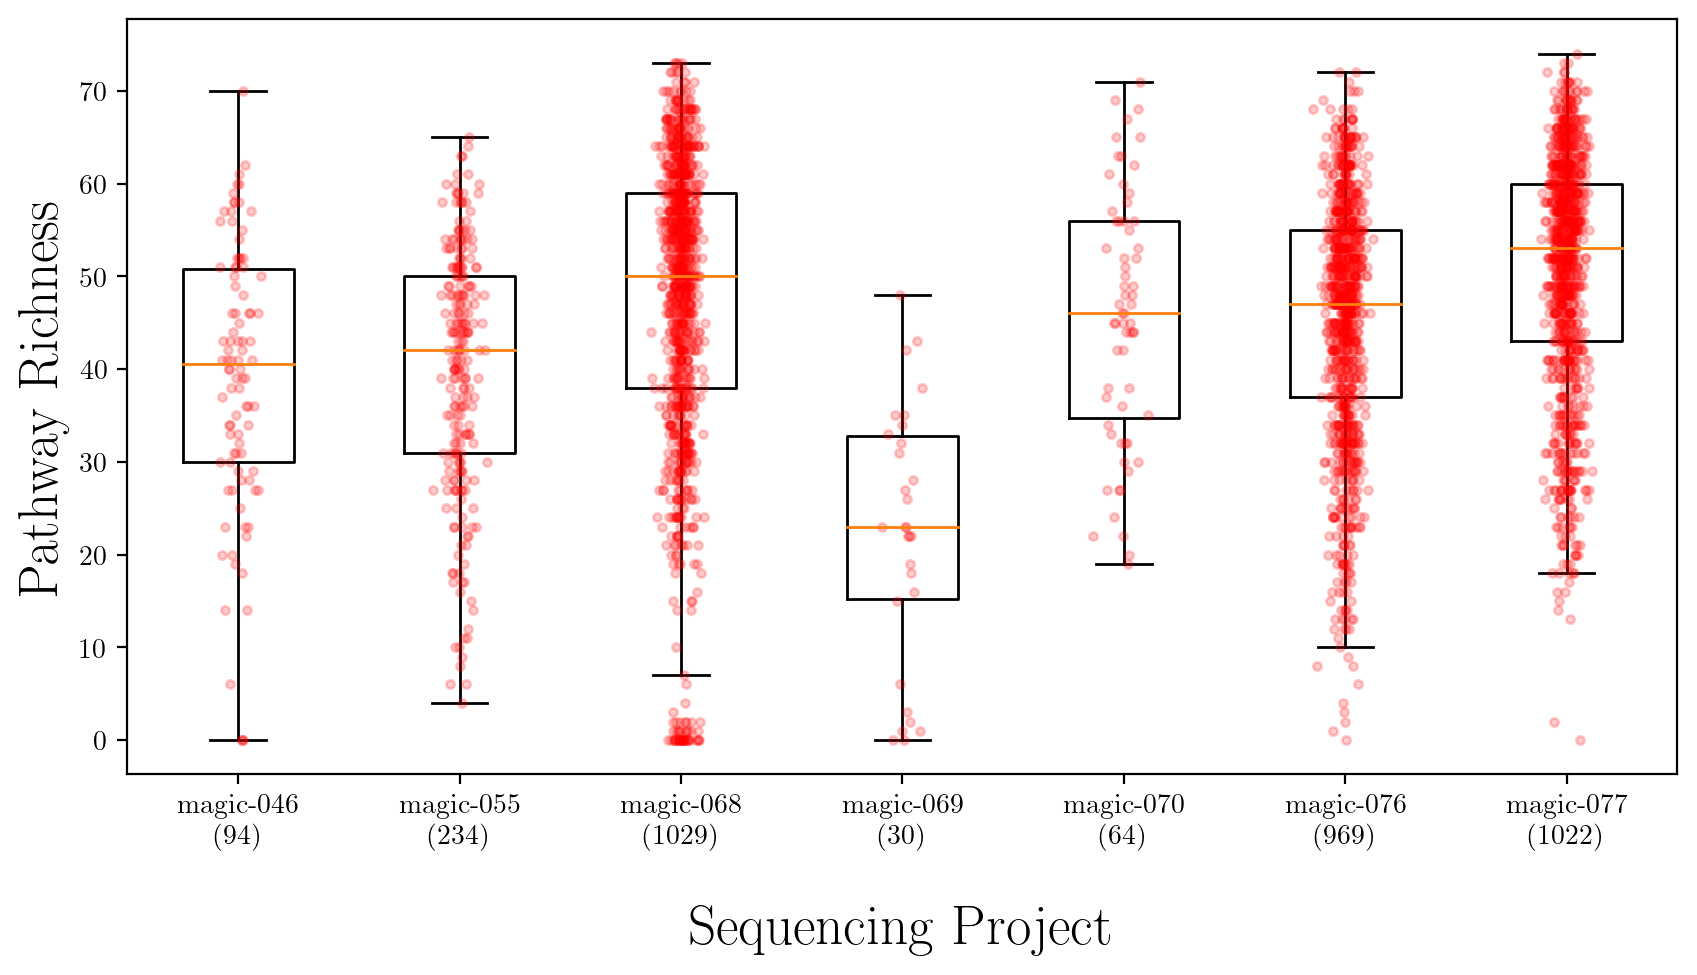

In [11]:
pathway_presence = (pathway_coverage_clean > 0.75)
counts = pathway_presence.sum(axis=1)

plt.figure(figsize=(10, 5), dpi=200, facecolor="white")

projects = np.unique(metadata["Sequencing_Project_num"])
labels = ["magic-" + proj + f"\n({metadata[metadata['Sequencing_Project_num'] == proj].shape[0]})" for proj in projects]

plt.boxplot([counts[metadata["Sequencing_Project_num"] == project] for project in projects],
            labels=labels, showfliers=False)

# add jitter
for i, project in enumerate(projects):
    richness_scores = counts[metadata["Sequencing_Project_num"] == project]
    x = np.random.normal(i + 1, 0.04, size=richness_scores.shape[0])
    plt.plot(x, richness_scores, "r.", alpha=0.2)

plt.ylabel("Pathway Richness", fontsize=20)
plt.xlabel("Sequencing Project", fontsize=20, labelpad=20)

In [14]:
metadata["Pathway Richness"] = (pathway_coverage_clean > 0.75).sum(axis=1)

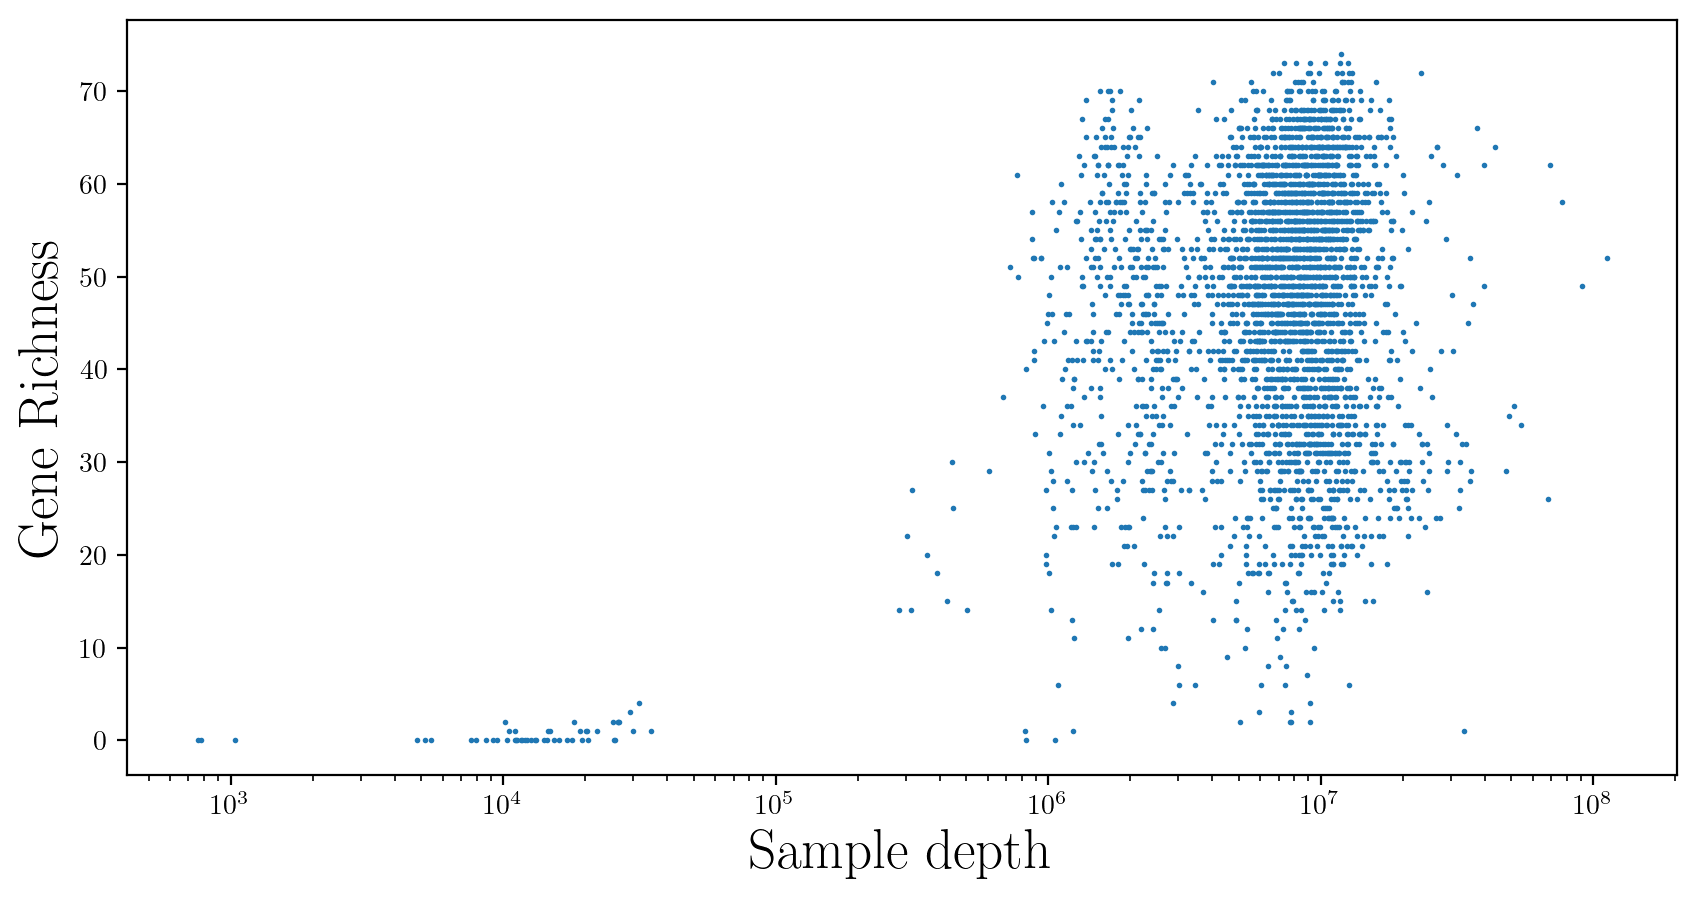

In [16]:
plt.figure(figsize=(10, 5), dpi=200)

plt.scatter(metadata["depth"], metadata["Pathway Richness"], s=1)
plt.xlabel("Sample depth", fontsize=20)
plt.ylabel("Gene Richness", fontsize=20)

plt.xscale("log")